# Task 1 : Prediction using Supervised Machine Learning

To Predict the percentage of marks of the students based on the number of hours they studied

AUTHOR:NAGUBANDI ALEKHYA

Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Importing Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
columns = list(df.columns)
columns

['Hours', 'Scores']

In [8]:
X = df["Hours"].values.reshape(-1,1)
Y = df["Scores"].values.reshape(-1,1)

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

Visualising Data

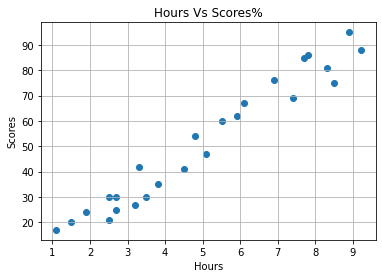

In [11]:
plt.scatter( X , Y , color = "#1f77b4" )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores%")
plt.grid()
plt.show()

The Graph shows Linear Relation between Hours and Scores

Splitting the data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
LR = LinearRegression()
LR

LinearRegression()

In [17]:
LR.fit(x_train,y_train)

LinearRegression()

In [18]:
line = LR.coef_ * X + LR.intercept_

Visualising Train Data

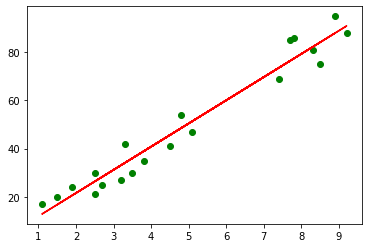

In [26]:
plt.scatter(x_train , y_train , color = "green")
plt.plot(X , line , color = "red")
plt.show()

Making Predictions

In [27]:
Y_pred = LR.predict(x_test)
Y_pred

array([[28.29854338],
       [68.78094963],
       [55.28681421],
       [61.0700151 ],
       [59.14228147]])

Visualising Test Data

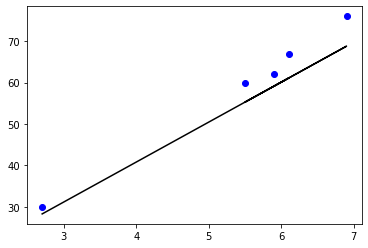

In [28]:
plt.scatter(x_test,y_test , color = "blue")
plt.plot(x_test,Y_pred , color = "black")
plt.show()

In [29]:
df_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] ,"Actual Score" :y_test.reshape(1,-1)[0], 
                           "Predicted Score" : Y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Score,Predicted Score
0,2.7,30,28.298543
1,6.9,76,68.780950
2,5.5,60,55.286814
3,6.1,67,61.070015
4,5.9,62,59.142281


Evaluating the model

In [30]:
df_sorted = df_predict.sort_values(by = "Hours")
df_sorted

,Hours,Actual Score,Predicted Score
0,2.7,30,28.298543
2,5.5,60,55.286814
4,5.9,62,59.142281
3,6.1,67,61.070015
1,6.9,76,68.780950


In [32]:
import seaborn as sns

C:\Users\Pravallika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pravallika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


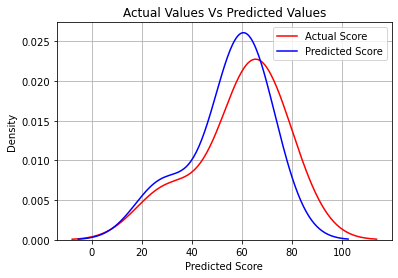

In [33]:
title = "Actual Values Vs Predicted Values"
ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)
plt.legend()
plt.grid()
plt.title(title)
plt.show()

In [38]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('Accuracy:', metrics.r2_score(y_test, Y_pred))

Mean Absolute Error: 4.4842792417677035
Mean Squared Error: 24.11100785917006
Root Mean Squared Error: 4.910296107076442
Accuracy: 0.8998712298207223
